### Etapas do Trabalho:  Estudo de Caso sobre Turismo e Aprendizado de Máquina 
 - Aluno: Igor Souza Cruz

In [43]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
import seaborn as srn
import statistics  as sts

In [3]:
# Carregamento da base de dados 
# O ano de 2019 foi escolhido devido a ser um ano marcante pois se refere ao inicio da pandemia e como os turistas foram uns dos vetores
# Sera realizada uma analize dos turistas que chegaram ao ceara no ano de 2019
chegada_turista_internacionais = pd.read_csv('chegadas_2019.csv',sep = ';')
chegada_turista_internacionais.shape

(49104, 12)

In [5]:
chegada_turista_internacionais.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2019,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2019,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Aérea,1,2019,março,3,0
3,África,1,África do Sul,2,Acre,1,Aérea,1,2019,abril,4,0
4,África,1,África do Sul,2,Acre,1,Aérea,1,2019,maio,5,0


In [7]:
turistas_internacionais_no_ceara = chegada_turista_internacionais[chegada_turista_internacionais['UF'] == 'Ceará']
turistas_internacionais_no_ceara.shape

(2232, 12)

In [9]:
turistas_internacionais_no_ceara.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
12276,África,1,África do Sul,2,Ceará,6,Aérea,1,2019,janeiro,1,0
12277,África,1,África do Sul,2,Ceará,6,Aérea,1,2019,fevereiro,2,1
12278,África,1,África do Sul,2,Ceará,6,Aérea,1,2019,março,3,1
12279,África,1,África do Sul,2,Ceará,6,Aérea,1,2019,abril,4,0
12280,África,1,África do Sul,2,Ceará,6,Aérea,1,2019,maio,5,2


In [11]:
turistas_internacionais_no_ceara.tail()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
14503,Oceania,7,Outros países,998,Ceará,6,Marítima,3,2019,agosto,8,0
14504,Oceania,7,Outros países,998,Ceará,6,Marítima,3,2019,setembro,9,0
14505,Oceania,7,Outros países,998,Ceará,6,Marítima,3,2019,outubro,10,0
14506,Oceania,7,Outros países,998,Ceará,6,Marítima,3,2019,novembro,11,0
14507,Oceania,7,Outros países,998,Ceará,6,Marítima,3,2019,dezembro,12,0


In [23]:
agrupado_por_continente = turistas_internacionais_no_ceara.groupby(['Continente']).size()
agrupado_por_continente

Continente
América Central e Caribe       264
América do Norte                72
América do Sul                 288
Continente não especificado     24
Europa                         792
Oceania                         72
África                         264
Ásia                           456
dtype: int64

<Axes: xlabel='Continente'>

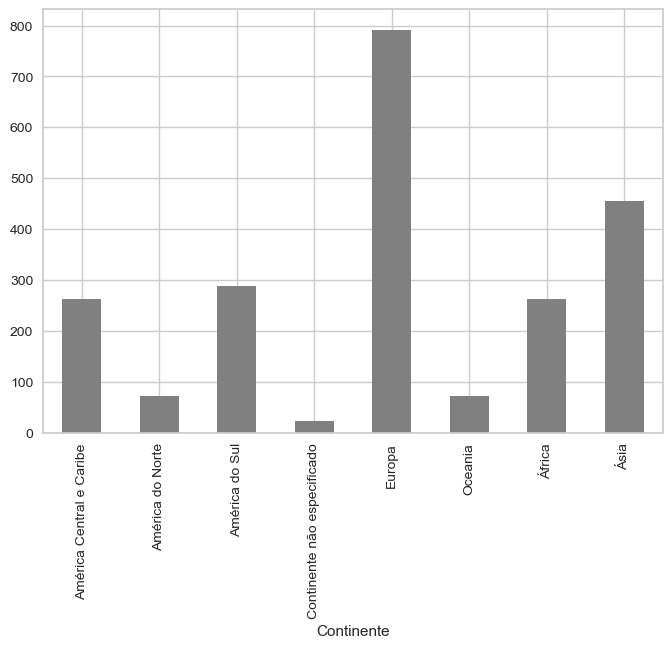

In [25]:
agrupado_por_continente.plot.bar(color = 'gray')

In [27]:
turistas_internacionais_no_ceara['Chegadas'].describe()

count    2232.000000
mean       50.591398
std       224.638644
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      3301.000000
Name: Chegadas, dtype: float64

In [51]:
mediana = sts.median(turistas_internacionais_no_ceara['Chegadas'])
mediana

0.0

Text(0.5, 1.0, 'Chegadas')

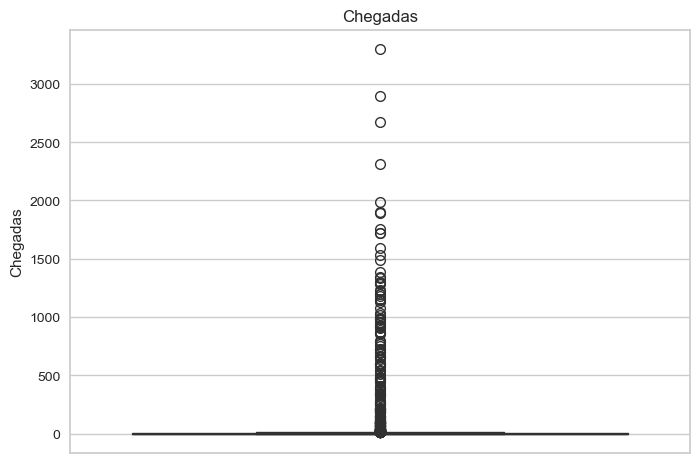

In [33]:
srn.boxplot(turistas_internacionais_no_ceara['Chegadas']).set_title('Chegadas')

C:\Users\Igor\AppData\Local\Temp\ipykernel_20412\3889028155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(turistas_internacionais_no_ceara['Chegadas']).set_title('Chegadas')


Text(0.5, 1.0, 'Chegadas')

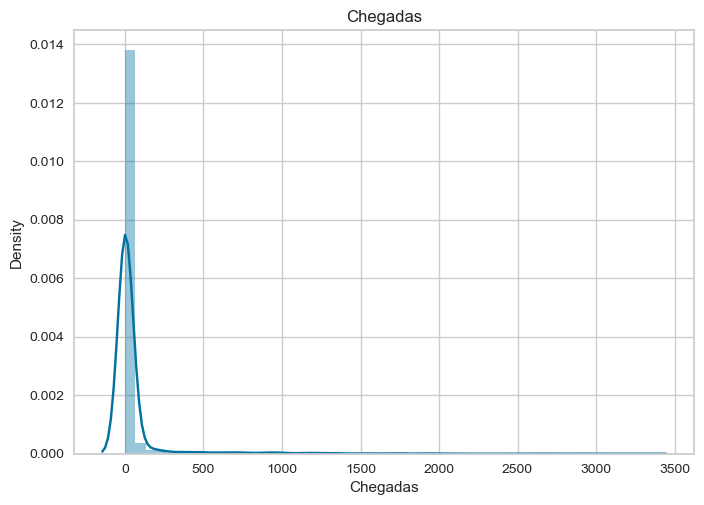

In [57]:
srn.distplot(turistas_internacionais_no_ceara['Chegadas']).set_title('Chegadas')

In [61]:
turistas_internacionais_no_ceara['País'].value_counts()

País
Outros países    120
África do Sul     24
Áustria           24
Finlândia         24
Estônia           24
                ... 
Equador           24
Colômbia          24
Chile             24
Bolívia           24
Nova Zelândia     24
Name: count, Length: 89, dtype: int64

In [39]:
agrupado_por_via = turistas_internacionais_no_ceara.groupby(['Via']).size()
agrupado_por_via

Via
Aérea       1116
Marítima    1116
dtype: int64

In [53]:
agrupado_por_mes = turistas_internacionais_no_ceara.groupby(['Mês']).size()
agrupado_por_mes

Mês
abril        186
agosto       186
dezembro     186
fevereiro    186
janeiro      186
julho        186
junho        186
maio         186
março        186
novembro     186
outubro      186
setembro     186
dtype: int64

<Axes: xlabel='Mês'>

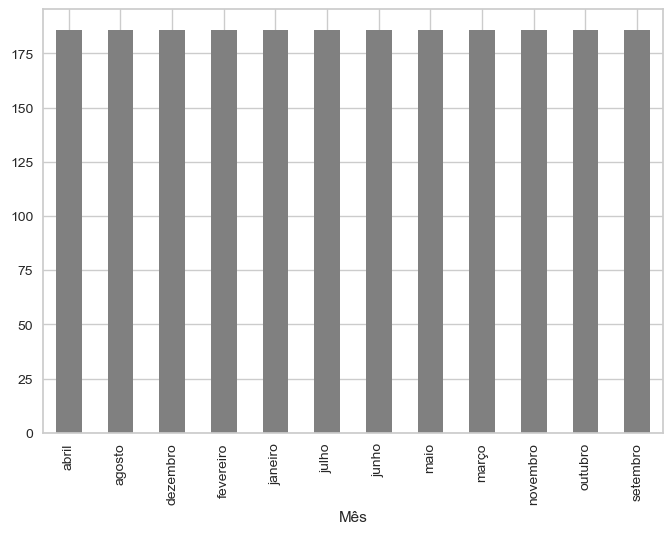

In [55]:
agrupado_por_mes.plot.bar(color = 'gray')

In [41]:
turistas_internacionais_no_ceara.isnull().sum()

Continente        0
cod continente    0
País              0
cod pais          0
UF                0
cod uf            0
Via               0
cod via           0
ano               0
Mês               0
cod mes           0
Chegadas          0
dtype: int64